In [1]:
import numpy as np
import pandas as pd
import find_split as fs
import evaluation as ev
import matplotlib.pyplot as plt
import trees

In [2]:
data = np.loadtxt('clean_dataset.txt')
print(data[:5])

[[-64. -56. -61. -66. -71. -82. -81.   1.]
 [-68. -57. -61. -65. -71. -85. -85.   1.]
 [-63. -60. -60. -67. -76. -85. -84.   1.]
 [-61. -60. -68. -62. -77. -90. -80.   1.]
 [-63. -65. -60. -63. -77. -81. -87.   1.]]


In [3]:
#training the tree
decisionTree=trees.binarySearchTree(data)
print('Max depth is',decisionTree.get_max_depth())

Max depth is 15


In [4]:
#just to test, predict the entire training set's labels
train_pred=decisionTree.predict(data[:,:-1])
train_pred

array([1, 1, 1, ..., 4, 4, 4])

In [5]:
#actual labels
data[:,-1]

array([1., 1., 1., ..., 4., 4., 4.])

In [6]:
#check if every label predicted is same as actual label and hence our model is working perfectly
print(np.all(train_pred==data[:,-1]))

True


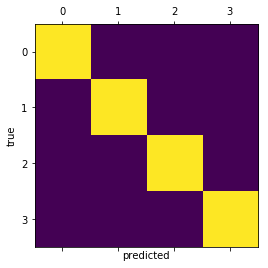

avg recall precision (1.0, 1.0)
avg classification rate 1.0


In [7]:
cm=ev.confusion_matrix(data[:,-1],train_pred,plot=True)
print('avg recall precision',ev.avg_recall_precision(cm))
print('avg classification rate',ev.avg_classification_rate(cm))

In [8]:
#testing a training set and test set using a 70:30 split
data2=data.copy()
#shuffle data
np.random.shuffle(data2)
split=0.7
train=data2[:int(len(data2)*split)]
test=data2[int(len(data2)*split):]

model=trees.binarySearchTree(train)
print('Max depth is',model.get_max_depth())

Max depth is 14


In [9]:
#get prediction
y_pred=model.predict(test[:,:-1])

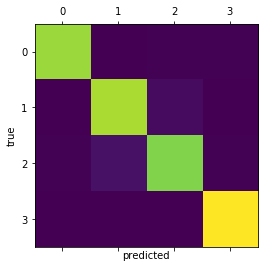

[[140, 0, 1, 1], [0, 144, 5, 0], [1, 8, 134, 1], [0, 0, 0, 165]]
avg recall precision (0.970728500383359, 0.970728500383359)
avg classification rate 0.9716666666666667


In [10]:
#evaluate
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
print(cm)
print('avg recall precision',ev.avg_recall_precision(cm))
print('avg classification rate',ev.avg_classification_rate(cm))